# Single-Cell RNA-Seq Clustering with Scanpy

In [1]:

import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import warnings

#configure scanpy settings
sc.settings.verbosity = 0   ### suppress output of scanpy
warnings.filterwarnings('ignore') # suppress Warnings
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

# create output directories
if not os.path.exists("outs"):
    os.makedirs("outs")

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.9.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


# Optimise Clustering Parameters

In [2]:
# Review output
results_df = pd.read_csv("./clusters.csv")

In [3]:
results_df = results_df.drop_duplicates(keep=False)

In [4]:
results_df[["number_of_clusters","sil","davie_bould"]] = results_df[[
    "number_of_clusters","sil","davie_bould"]].astype('float')

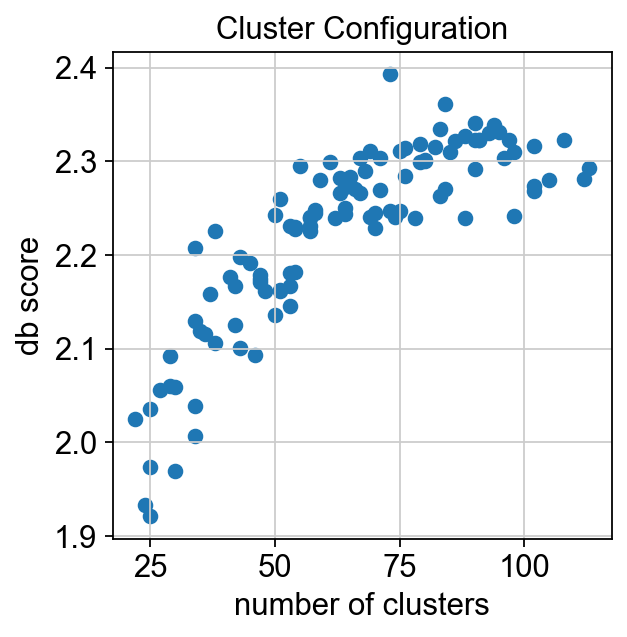

In [5]:
#visualise db scores
plt.scatter(results_df['number_of_clusters'], results_df['davie_bould'])
plt.title("Cluster Configuration")
plt.xlabel('number of clusters')
plt.ylabel('db score')
plt.savefig("db_scores.png")

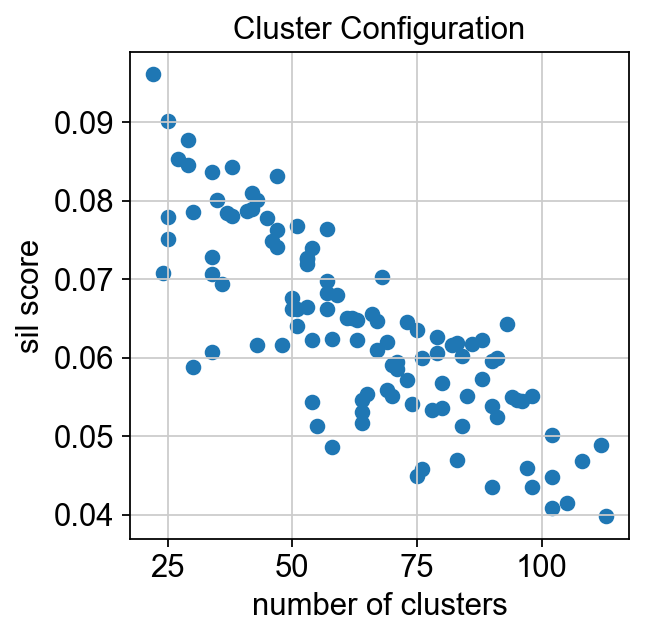

In [6]:
#visualise sil scores
plt.scatter(results_df['number_of_clusters'], results_df['sil'])
plt.title("Cluster Configuration")
plt.xlabel('number of clusters')
plt.ylabel('sil score')
plt.savefig("sil_scores.png")

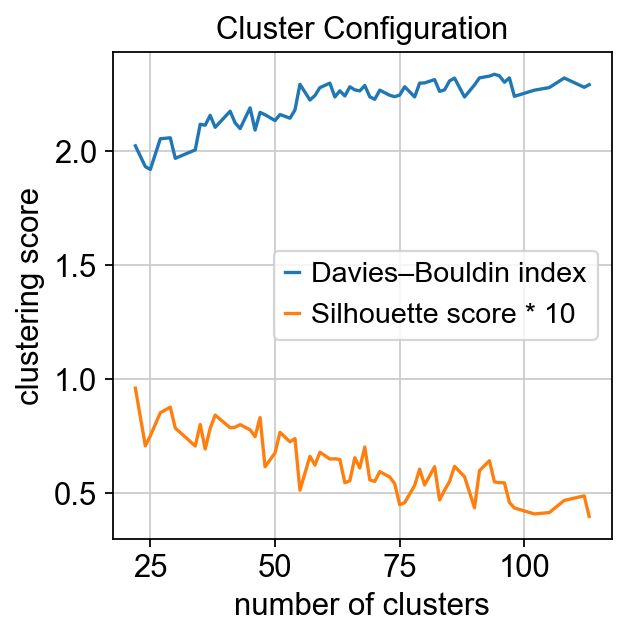

In [7]:
# make new dataframe for plotting to find optimal cluster number
max_sil = results_df[results_df.groupby('number_of_clusters')['sil'].transform('max') 
          == results_df['sil']].sort_values(by=['number_of_clusters'])

min_db = results_df[results_df.groupby('number_of_clusters')['davie_bould'].transform('min') 
         == results_df['davie_bould']].sort_values(by=['number_of_clusters'])

# plot the top value for each cluster

plt.plot(min_db['number_of_clusters'], min_db['davie_bould'])
plt.plot(max_sil['number_of_clusters'], min_db['sil'] * 10)
plt.title("Cluster Configuration")
plt.legend(['Davies–Bouldin index','Silhouette score * 10'])
plt.xlabel('number of clusters')
plt.ylabel('clustering score')
plt.savefig("cluster_numbers.png")

# Cluster Visualisation

### 70 selected

In [18]:
#extract possible configurations for optimal cluster number
nclusters = results_df[results_df['number_of_clusters'] == 70].sort_values('sil', ascending=False)
nclusters.to_csv("outs/core-atlas_optimal_clusters.csv")
nclusters.head(8)

,Unnamed: 0,method,KNN,resolution,number_of_clusters,sil,davie_bould,min_cell_n
50,0.0,leiden,15,1.7,70.0,0.068046,2.152789,83
